C:\Users\kjbsh\AppData\Local\Temp\ipykernel_17208\3098258422.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['<DATE>'] = pd.to_datetime(analysis_df['<DATE>'], format='%Y%m%d')


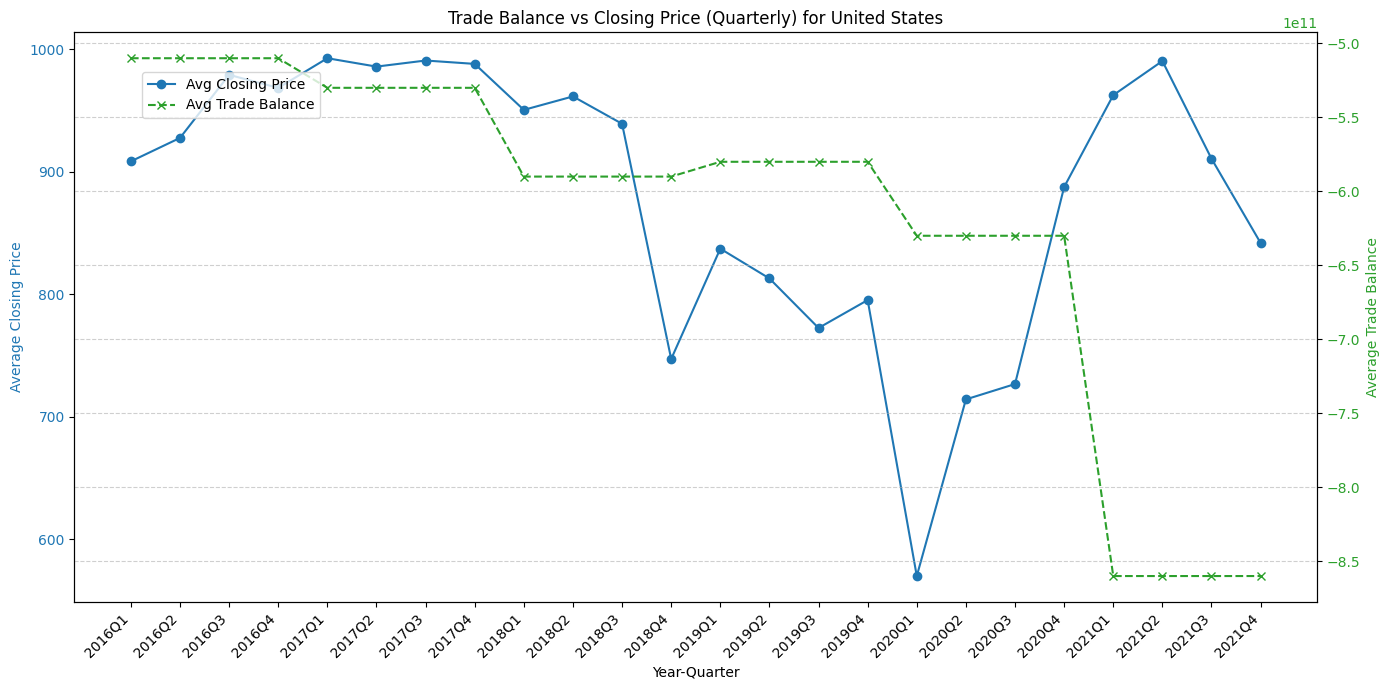

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data from a text file (comma-separated)
data = pd.read_csv('finalMerged.txt', sep=',', engine='python')

# Calculate trade balance (Exports - Imports)
data['Trade_Balance'] = data['Exports of goods and services'] - data['Imports of goods and services']

# Select relevant columns for analysis
analysis_df = data[['Country', 'Year', 'Quarter', '<DATE>', '<CLOSE>', 'Exports of goods and services', 'Imports of goods and services', 'Trade_Balance']]

# Convert date column properly
analysis_df['<DATE>'] = pd.to_datetime(analysis_df['<DATE>'], format='%Y%m%d')

# Aggregate data by Year and Quarter (calculate mean values)
aggregated_df = analysis_df.groupby(['Country', 'Year', 'Quarter']).agg({
    '<CLOSE>': 'mean',
    'Trade_Balance': 'mean'
}).reset_index()

# Create a clear label for Year-Quarter
aggregated_df['Year_Quarter'] = aggregated_df['Quarter']

# Example: plot Trade Balance and Closing Price for a selected country
country_to_analyze = 'United States'
country_df = aggregated_df[aggregated_df['Country'] == country_to_analyze]

fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Closing Price with markers
ax1.set_xlabel('Year-Quarter')
ax1.set_ylabel('Average Closing Price', color='tab:blue')
ax1.plot(country_df['Year_Quarter'], country_df['<CLOSE>'], marker='o', linestyle='-', label='Avg Closing Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot Trade Balance on a secondary y-axis with markers
ax2 = ax1.twinx()
ax2.set_ylabel('Average Trade Balance', color='tab:green')
ax2.plot(country_df['Year_Quarter'], country_df['Trade_Balance'], marker='x', linestyle='--', label='Avg Trade Balance', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Improve layout and clarity
fig.autofmt_xdate(rotation=45)

# Add grid, legend, and title
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.grid(True, linestyle='--', alpha=0.6)
plt.title(f'Trade Balance vs Closing Price (Quarterly) for {country_to_analyze}')
fig.tight_layout()
plt.show()